<a href="https://colab.research.google.com/github/NileshCT/Machine_Learning_Models/blob/main/Classification_Modelling_WeatherAUSipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#importing dataset for EDA and Modelling
df=pd.read_csv("/content/drive/MyDrive/weatherAUS.csv.zip")

**Data Understanding**

In [3]:
#Exploring top five records.
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
#Exploring last five records
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
#Exploring the total rows and columns.
df.shape

(145460, 23)

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
#Exploring all non null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
#Exploring ststistical information of the numeric features.
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [9]:
#Exploring all nunique counts from dataframe.
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [10]:
df.drop(["Date"],axis=1,inplace=True)

In [11]:
df["RainTomorrow"].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
df["RainToday"].unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
#Exploring duplicated count in tha dataframe and there are zero duplicates.
df.duplicated().sum()

215

In [14]:
#Exploring all numeric_features from dataframe.
numeric_feature=df.describe(include=float).columns
numeric_feature

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [15]:
#Exploring all numeric_features from dataframe.
categorical_feature=df.describe(include=object).columns
categorical_feature

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [16]:
#Creating new dataframe by cloning df dataframe.
df1=df.copy()

In [17]:
#Considering all features except the raintomorrow feature.
df1=df1.iloc[:,:-1]

In [18]:
df1.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

**Missing value treatment**

In [19]:
#Exploring the sum of all null values in df dataframe.
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [20]:
#Exploring the sum of all null values in df1 dataframe.
df1.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
dtype: int64

In [21]:
#Using ffill and bfill method togethor to treat missing values in the dataframe.
df1=df1.fillna(method="ffill",axis=0).fillna(method="bfill",axis=0)
df1


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,12.0,12.3,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,No
1,Albury,7.4,25.1,0.0,12.0,12.3,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,8.0,2.0,17.2,24.3,No
2,Albury,12.9,25.7,0.0,12.0,12.3,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,12.0,12.3,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,8.0,2.0,18.1,26.5,No
4,Albury,17.5,32.3,1.0,12.0,12.3,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,10.0,10.7,E,31.0,SE,ENE,...,11.0,51.0,24.0,1024.6,1020.3,8.0,7.0,10.1,22.4,No
145456,Uluru,3.6,25.3,0.0,10.0,10.7,NNW,22.0,SE,N,...,9.0,56.0,21.0,1023.5,1019.1,8.0,7.0,10.9,24.5,No
145457,Uluru,5.4,26.9,0.0,10.0,10.7,N,37.0,SE,WNW,...,9.0,53.0,24.0,1021.0,1016.8,8.0,7.0,12.5,26.1,No
145458,Uluru,7.8,27.0,0.0,10.0,10.7,SE,28.0,SSE,N,...,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No


In [22]:
#Exploring random samples from dataframe.
df1.sample(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
113897,Witchcliffe,10.4,19.1,0.4,8.4,1.5,WNW,37.0,NNW,NW,...,11.0,75.0,67.0,1021.7,1020.2,3.0,8.0,15.2,16.6,No
67799,Melbourne,23.0,34.3,0.0,14.2,10.1,N,74.0,N,N,...,39.0,38.0,24.0,1015.2,1010.8,1.0,7.0,25.4,33.1,No
121973,Perth,13.2,27.4,0.0,5.4,10.8,SSW,35.0,S,SSW,...,19.0,66.0,45.0,1018.0,1016.1,0.0,0.0,20.7,25.5,No
59119,Bendigo,11.7,19.5,0.0,1.2,2.8,NE,35.0,N,NW,...,13.0,54.0,52.0,1019.5,1019.4,4.0,6.0,16.1,18.6,No
12787,Moree,12.7,30.7,0.0,9.3,9.2,NE,35.0,ENE,NE,...,9.0,50.0,28.0,1014.5,1013.1,6.0,7.0,22.7,29.5,No
120536,PerthAirport,11.0,28.3,0.0,8.0,11.1,E,54.0,ENE,NNE,...,11.0,48.0,25.0,1018.3,1013.3,0.0,0.0,19.5,28.3,No
85167,Brisbane,10.6,24.7,6.0,5.2,11.4,SSE,28.0,WSW,ENE,...,13.0,53.0,44.0,1022.0,1018.1,0.0,1.0,18.3,22.1,Yes
115429,PearceRAAF,17.4,32.5,0.0,8.4,10.8,E,67.0,E,ESE,...,17.0,48.0,28.0,1013.5,1009.3,2.0,1.0,21.9,32.2,No
30064,Richmond,18.1,27.4,0.2,2.0,8.0,SSE,44.0,SSW,S,...,17.0,58.0,49.0,1013.6,1012.5,1.0,1.0,21.7,27.0,No
4181,BadgerysCreek,18.6,21.0,39.2,12.0,12.3,SW,28.0,SSW,SE,...,11.0,98.0,81.0,1014.0,1015.1,7.0,8.0,18.7,21.0,Yes


In [23]:
df1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,12.0,12.3,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,No
1,Albury,7.4,25.1,0.0,12.0,12.3,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,8.0,2.0,17.2,24.3,No
2,Albury,12.9,25.7,0.0,12.0,12.3,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,12.0,12.3,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,8.0,2.0,18.1,26.5,No
4,Albury,17.5,32.3,1.0,12.0,12.3,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


**Data Cleaning process**

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

In [25]:
#Q1 and Q2 values and IQR results
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR=Q3-Q1


In [26]:
df1= df1[~((df1 < (Q1 - 12* IQR)) |(df1 > (Q3 + 12* IQR))).any(axis=1)]
df1.shape

<ipython-input-26-b732aae89a50>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1= df1[~((df1 < (Q1 - 12* IQR)) |(df1 > (Q3 + 12* IQR))).any(axis=1)]


(136184, 21)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136184 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       136184 non-null  object 
 1   MinTemp        136184 non-null  float64
 2   MaxTemp        136184 non-null  float64
 3   Rainfall       136184 non-null  float64
 4   Evaporation    136184 non-null  float64
 5   Sunshine       136184 non-null  float64
 6   WindGustDir    136184 non-null  object 
 7   WindGustSpeed  136184 non-null  float64
 8   WindDir9am     136184 non-null  object 
 9   WindDir3pm     136184 non-null  object 
 10  WindSpeed9am   136184 non-null  float64
 11  WindSpeed3pm   136184 non-null  float64
 12  Humidity9am    136184 non-null  float64
 13  Humidity3pm    136184 non-null  float64
 14  Pressure9am    136184 non-null  float64
 15  Pressure3pm    136184 non-null  float64
 16  Cloud9am       136184 non-null  float64
 17  Cloud3pm       136184 non-nul

In [28]:
df1.describe(include=object).columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

In [29]:
#Lebal encoding process
from sklearn import preprocessing
L_Encoder=preprocessing.LabelEncoder()


In [30]:
df1["Location"]=L_Encoder.fit_transform(df1["Location"])

<ipython-input-30-16cb5482e890>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Location"]=L_Encoder.fit_transform(df1["Location"])


In [31]:
df1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,13.4,22.9,0.6,12.0,12.3,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,No
1,2,7.4,25.1,0.0,12.0,12.3,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,8.0,2.0,17.2,24.3,No
2,2,12.9,25.7,0.0,12.0,12.3,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,No
3,2,9.2,28.0,0.0,12.0,12.3,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,8.0,2.0,18.1,26.5,No
4,2,17.5,32.3,1.0,12.0,12.3,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
df1["WindGustDir"]=L_Encoder.fit_transform(df1["WindGustDir"])

In [34]:
df1["WindGustDir"].unique()

array([13, 14, 15,  4,  6,  3,  5, 12,  1, 10,  8,  7,  9,  2,  0, 11])

In [35]:
df1["WindDir9am"]=L_Encoder.fit_transform(df1["WindDir9am"])

In [36]:
df1["WindDir9am"].unique()

array([13,  6,  9,  1, 12, 10,  8,  4, 11,  2,  0,  3,  7, 15, 14,  5])

In [37]:
df1["WindDir3pm"]=L_Encoder.fit_transform(df1["WindDir3pm"])

In [38]:
df1["WindDir3pm"].unique()

array([14, 15,  0,  7, 13, 10,  2,  1, 11,  6,  9,  3, 12,  8,  5,  4])

In [39]:
df1["RainToday"]=L_Encoder.fit_transform(df1["RainToday"])

In [40]:
df1["RainToday"].unique()

array([0, 1])

In [101]:
# import module
from sklearn.preprocessing import StandardScaler
# compute required values
scaler =StandardScaler()
model1= scaler.fit(df1)
scaled_data1 = model1.transform(df1)
print(scaled_data1)

[[-1.52928959  0.20789835 -0.06565094 ... -0.01165149 -0.00500346
  -0.45650593]
 [-1.52928959 -0.7290946   0.24323218 ...  0.03428658  0.35435714
  -0.45650593]
 [-1.52928959  0.1298156   0.32747303 ...  0.61616885  0.19623848
  -0.45650593]
 ...
 [ 1.21114456 -1.04142558  0.49595473 ... -0.68540991  0.61309676
  -0.45650593]
 [ 1.21114456 -0.6666284   0.50999487 ... -0.28727994  0.59872234
  -0.45650593]
 [ 1.21114456  0.44214658  0.50999487 ... -0.30259263 -0.13437327
  -0.45650593]]


<function matplotlib.pyplot.show(close=None, block=None)>

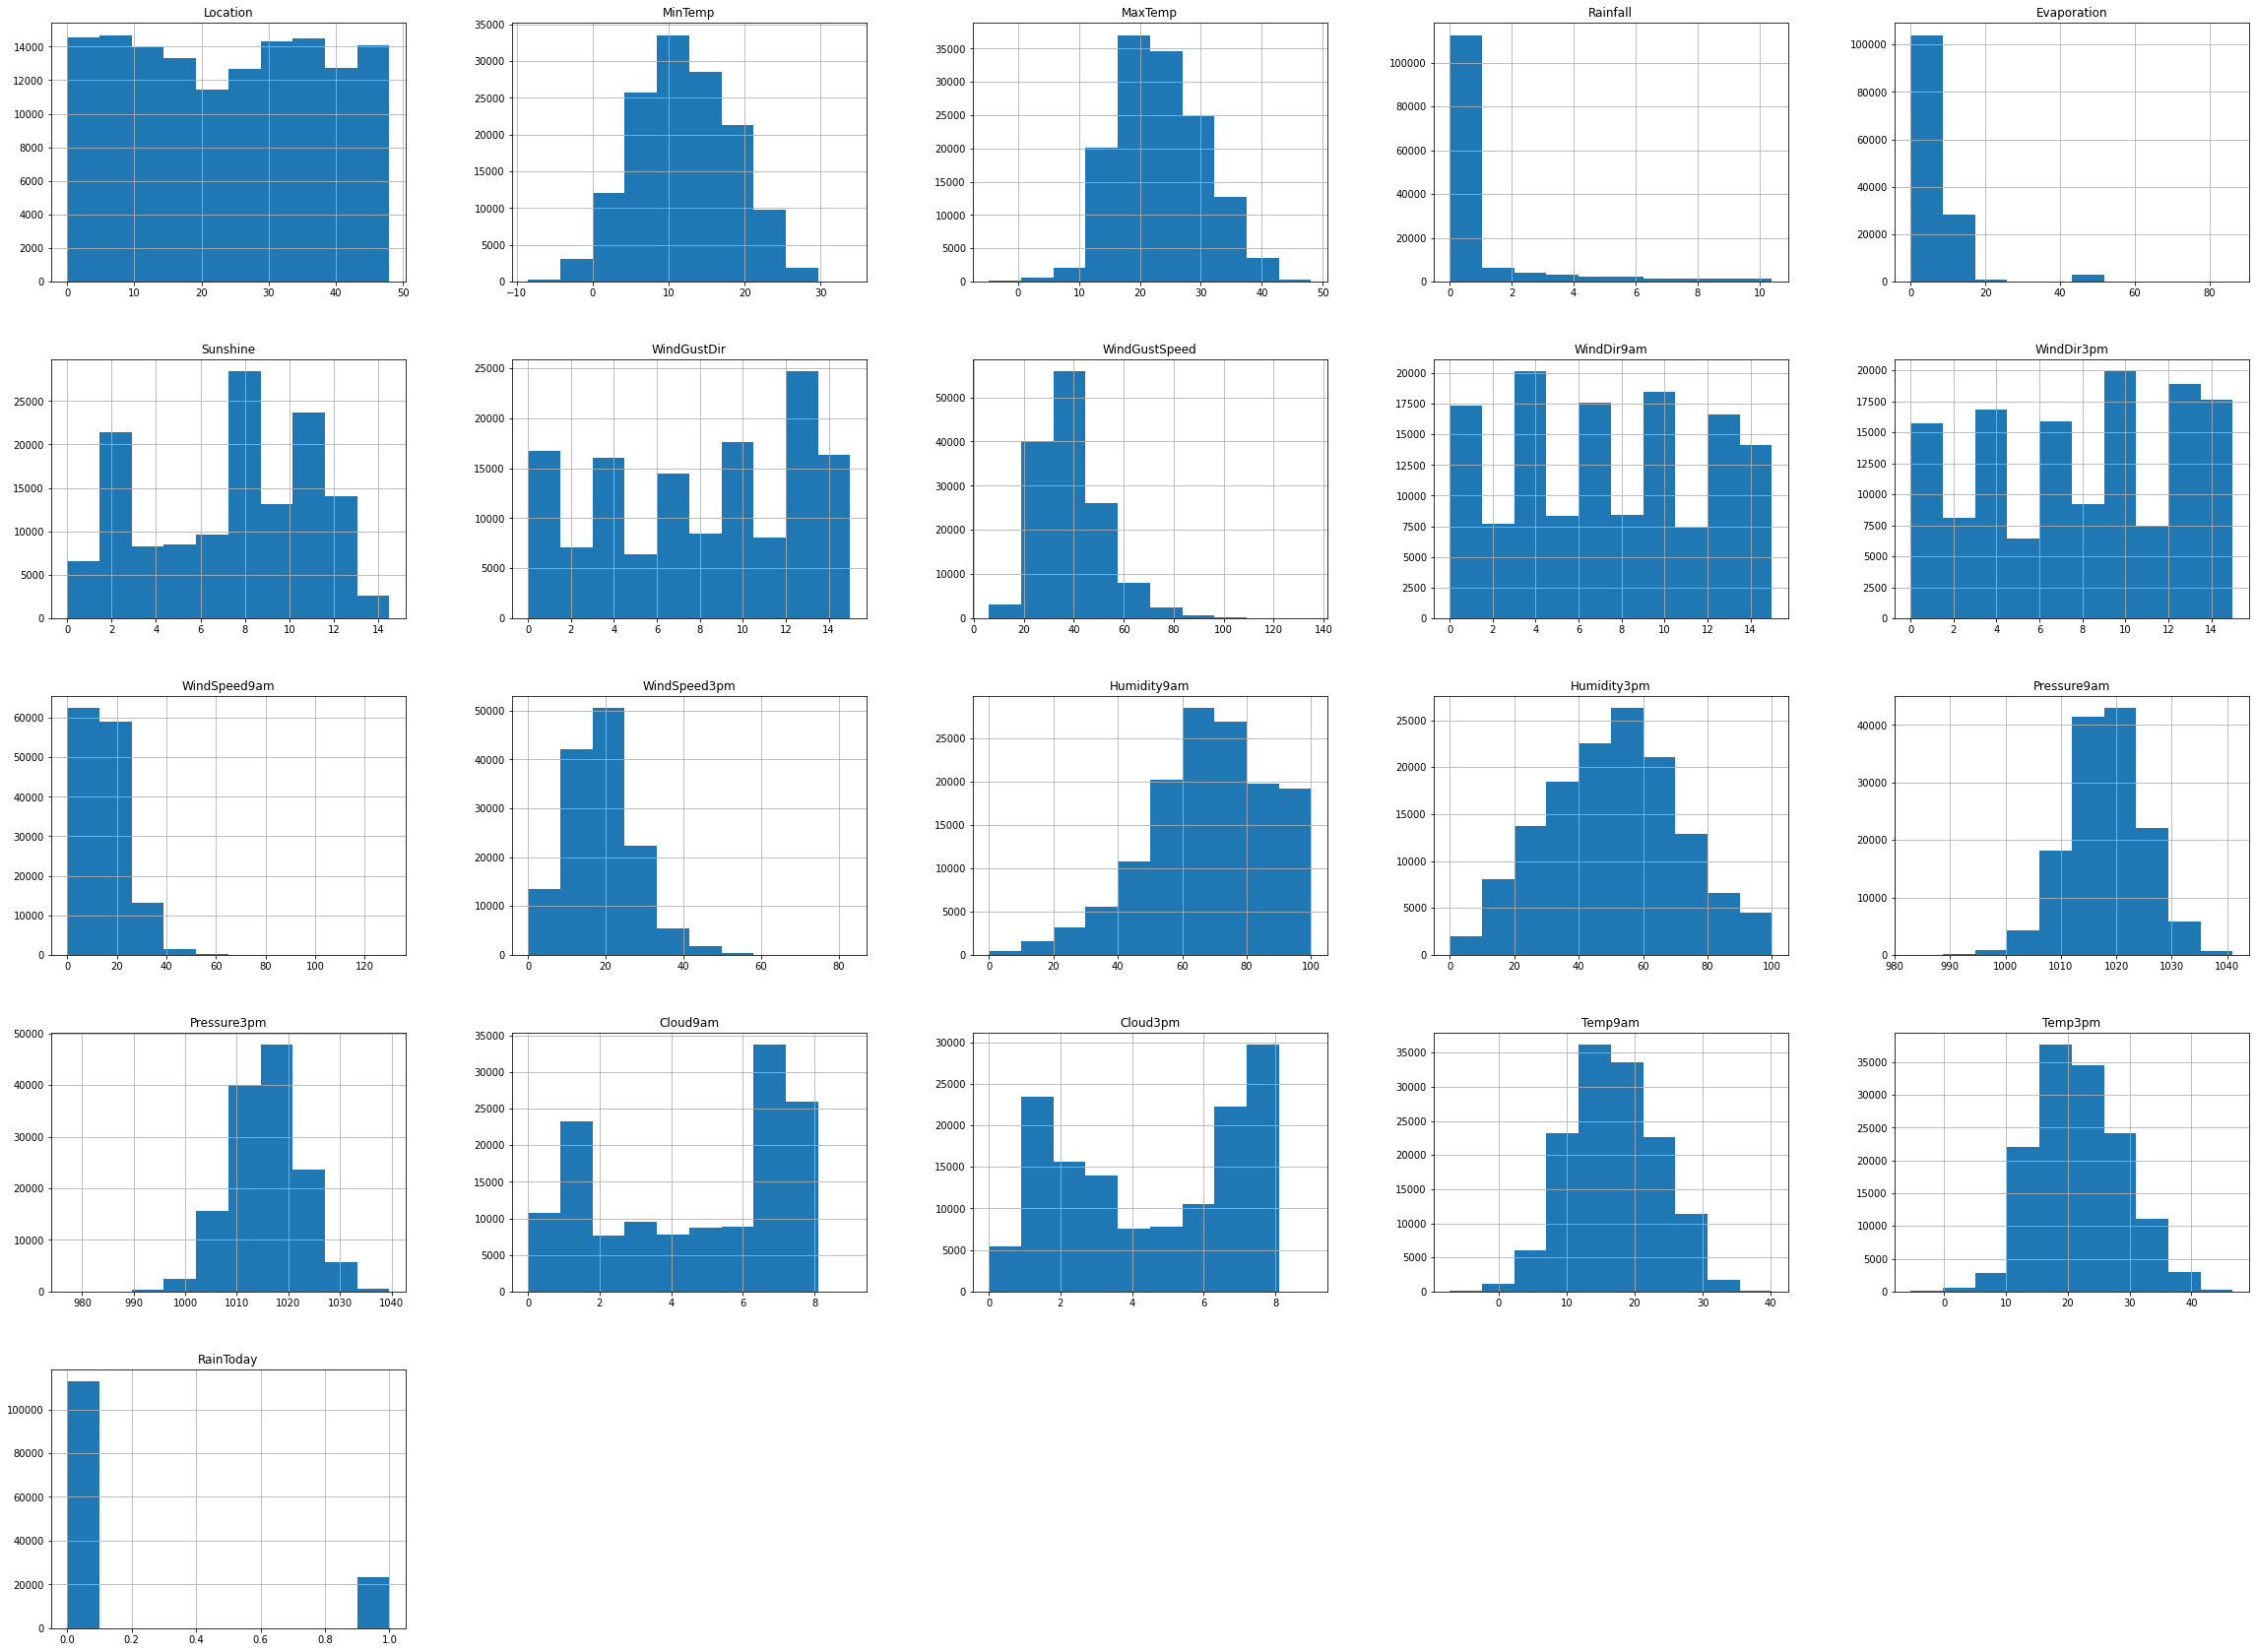

In [42]:
#Exploring data after use of StandardScaler
# plt.figure(figsize=(40,30))
df1.hist(figsize=(40,30))
plt.show


In [43]:
df["RainTomorrow"].shape

(145460,)

In [44]:
df["RainTomorrow"].notnull().sum()

142193

In [45]:
# nil=df.tail(3266)

In [46]:
# nil

In [47]:
# y=nil["RainTomorrow"]

In [48]:
# df1.shape

In [49]:
a=[(i,index) for i,index in enumerate(df["RainTomorrow"]) if pd.isna(index)]
result = pd.DataFrame(a).set_index(0)

In [50]:
# df.loc[14]

In [51]:
# a = []
# for i,index in enumerate(df["RainTomorrow"]):
#      if pd.isna(index):
#        a.append(index)

In [52]:
result

,1
0,
14,NaN
283,NaN
435,NaN
437,NaN
443,NaN
...,...
144955,NaN
145091,NaN
145092,NaN


In [53]:
#Exploring top five records of raintomorrow feature with nan values.
t=pd.DataFrame(a).set_index(0)
t.head()

,1
0,
14,NaN
283,NaN
435,NaN
437,NaN
443,NaN


In [54]:
#Convering the index which having nan values in the target variable.Converting this index in list.
index_nan=t.index.tolist()
index_nan

[14,
 283,
 435,
 437,
 443,
 452,
 455,
 464,
 611,
 983,
 984,
 985,
 986,
 1013,
 1374,
 1529,
 1530,
 1531,
 1685,
 1922,
 2031,
 2032,
 2033,
 2042,
 2913,
 2934,
 2942,
 2943,
 2944,
 3201,
 3211,
 3316,
 3338,
 3339,
 3384,
 3411,
 3412,
 3428,
 3433,
 3438,
 3446,
 3447,
 3452,
 3457,
 3462,
 3471,
 3472,
 3482,
 3517,
 3524,
 3525,
 3526,
 3529,
 3530,
 3532,
 3539,
 3542,
 3549,
 3552,
 3576,
 3584,
 3595,
 3629,
 3634,
 3639,
 3692,
 3760,
 3955,
 4044,
 4050,
 4131,
 4344,
 4345,
 4629,
 4644,
 4656,
 4845,
 4900,
 4911,
 4912,
 4935,
 4938,
 4939,
 5056,
 5079,
 5149,
 5393,
 5458,
 5459,
 5460,
 5461,
 5462,
 5841,
 5842,
 5843,
 5844,
 5845,
 5846,
 5847,
 5848,
 5849,
 5850,
 5851,
 5852,
 5853,
 5854,
 5855,
 5856,
 5857,
 5876,
 6294,
 6968,
 6969,
 6970,
 7446,
 7447,
 8529,
 8530,
 8588,
 8838,
 8839,
 8840,
 8841,
 8842,
 8843,
 8847,
 8848,
 8849,
 8904,
 8905,
 8906,
 9147,
 10238,
 10448,
 10534,
 10816,
 10820,
 10821,
 10822,
 10920,
 10921,
 10922,
 10923,
 1

In [55]:
# for i in index_nan:
#   nn=df1.iloc[i]
#   print(nn)
#   break

In [56]:
#Extracting only infercial data from dataframe.
df.iloc[index_nan]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,WNW,...,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
283,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,WNW,...,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,SW,...,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN
437,Albury,21.5,35.0,0.0,NaN,NaN,NaN,NaN,SSE,E,...,76.0,35.0,1015.8,1010.3,NaN,8.0,24.2,33.1,No,NaN
443,Albury,15.5,30.6,0.0,NaN,NaN,NaN,NaN,SE,SSW,...,66.0,30.0,1015.9,1013.8,NaN,NaN,19.4,30.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144955,Uluru,22.5,37.7,0.0,NaN,NaN,SE,50.0,SE,ESE,...,22.0,11.0,1012.6,1009.6,NaN,NaN,28.8,37.2,No,NaN
145091,Uluru,12.3,19.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,79.0,62.0,1016.8,1014.1,8.0,8.0,15.6,18.9,No,NaN
145092,Uluru,14.2,18.7,NaN,NaN,NaN,NaN,NaN,W,NaN,...,81.0,67.0,1015.2,1014.6,8.0,8.0,16.6,17.5,NaN,NaN
145335,Uluru,13.5,NaN,0.0,NaN,NaN,NaN,NaN,ENE,SW,...,23.0,11.0,1013.7,1008.4,NaN,NaN,25.2,34.4,No,NaN


In [57]:
# #Took reference from it for extract required rows to differenciate inferential data and known data.
# a=[12,13,15,17,16]
# b=[]
# c=[]
# for i in a:
#   if df["RainTomorrow"]
#     if i not in b:
#       b.append(i)
#   else:
#       c.append(i)
# print(b)
# print(c)


In [58]:
#Creating list of all non null values in the target variable for spliting in train and test data.
a=[]
for i in range(df.shape[0]):
  if i not in index_nan:
    a.append(i)


In [59]:
len(a)

142193

In [60]:
df.iloc[a]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [61]:
len(index_nan)

3267

In [62]:
df_Known_data=pd.DataFrame(df.iloc[a])

In [63]:
df_Known_data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [64]:
#Missing value tratment on known data
df_known_data1=df_Known_data.iloc[:,:-1]
df_known_data1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No


In [76]:
#Missing value tratment on df_known_data1
df_known_data1=df_known_data1.fillna(method="bfill",axis=0).fillna(method="ffill",axis=0)

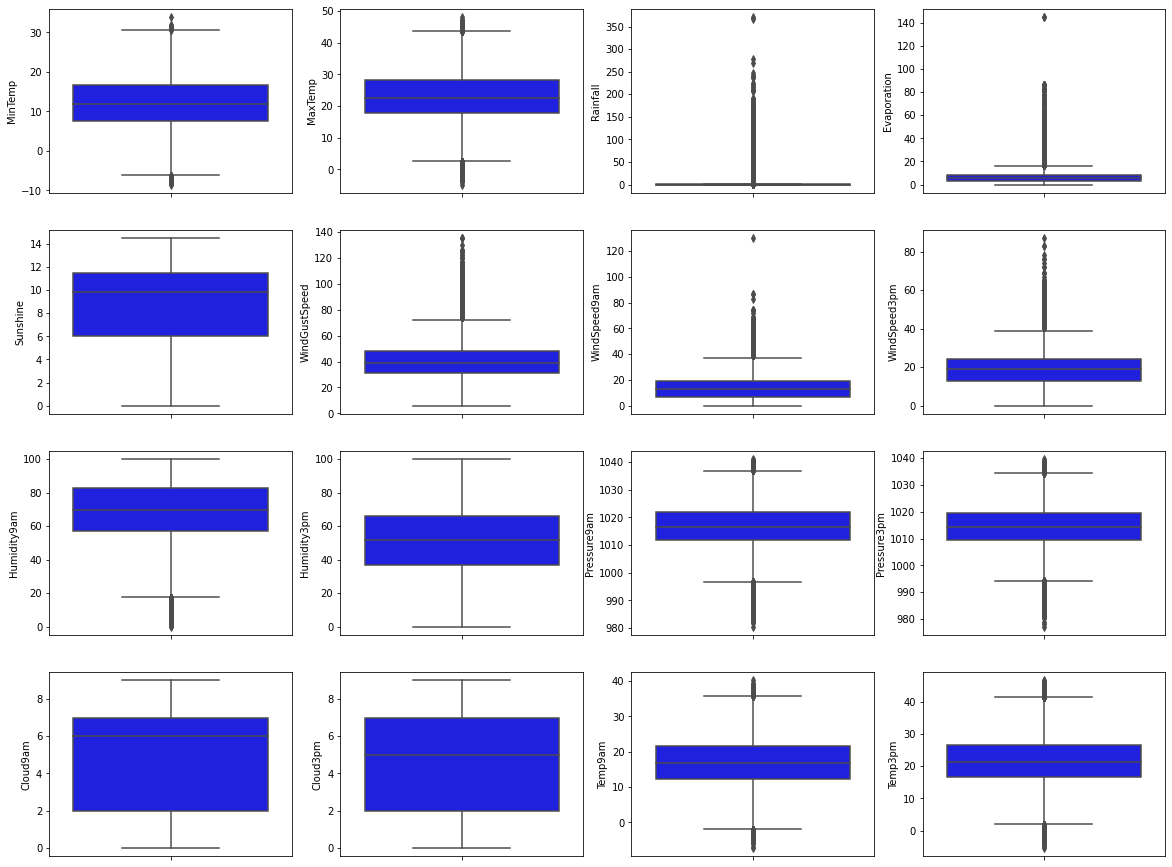

In [77]:
plt.figure(figsize=(20,40))
i=0
for col in numeric_feature:
  i+=1
  plt.subplot(10,4,i)
  sns.boxplot(df_known_data1,y=df_known_data1[col],color='blue')
plt.tight_layout
plt.show()

**Outliers tratment on known data using IQR method.**

In [78]:
Q1=df_known_data1.quantile(0.25)
Q3=df_known_data1.quantile(0.75)
IQR=Q3-Q1

In [79]:
print(IQR)

MinTemp           9.2
MaxTemp          10.3
Rainfall          0.8
Evaporation       5.2
Sunshine          5.5
WindGustSpeed    17.0
WindSpeed9am     12.0
WindSpeed3pm     11.0
Humidity9am      26.0
Humidity3pm      29.0
Pressure9am      10.1
Pressure3pm      10.1
Cloud9am          5.0
Cloud3pm          5.0
Temp9am           9.4
Temp3pm           9.9
dtype: float64


In [80]:
df_known_data2= df_known_data1[~((df_known_data1 < (Q1 - 12* IQR)) |(df_known_data1 > (Q3 + 12* IQR))).any(axis=1)]

In [81]:
df_known_data2.shape

(133077, 21)

**Label encoding on categorical data**

In [87]:
#Label encoding on known data
from sklearn import preprocessing
L_Encoder=preprocessing.LabelEncoder()
df_known_data2["Location"]=L_Encoder.fit_transform(df_known_data2["Location"])

In [88]:
df_known_data2["Location"].unique()

array([ 2,  4, 10, 11, 21, 24, 26, 27, 30, 34, 37, 38, 42, 45, 47,  9, 40,
       23,  5,  6, 35, 19, 18, 20, 25, 33, 44, 12,  7,  8, 14, 39,  0, 22,
       28, 48,  1, 46, 29, 32, 31, 36, 43, 15, 17,  3, 13, 16, 41])

In [89]:
df_known_data2["WindGustDir"]=L_Encoder.fit_transform(df_known_data2["WindGustDir"])

In [91]:
df_known_data2["WindGustDir"].unique()

array([13, 14, 15,  4,  6,  3,  5, 12,  1, 10,  8,  7,  9,  2,  0, 11])

In [93]:
df_known_data2["WindDir9am"]=L_Encoder.fit_transform(df_known_data2["WindDir9am"])

In [94]:
df_known_data2["WindDir9am"].unique()

array([13,  6,  9,  1, 12, 10,  8,  4, 11,  2,  0,  3,  7, 15, 14,  5])

In [95]:
df_known_data2["WindDir3pm"]=L_Encoder.fit_transform(df_known_data2["WindDir3pm"])

In [96]:
df_known_data2["WindDir3pm"].unique()

array([14, 15,  0,  7, 13, 10,  2,  1, 11,  6,  9,  3, 12,  8,  5,  4])

In [97]:
df_known_data2["RainToday"]=L_Encoder.fit_transform(df_known_data2["RainToday"])

In [98]:
df_known_data2["RainToday"].unique()

array([0, 1])

In [99]:
df_known_data2.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,13.4,22.9,0.6,12.0,12.3,13,44.0,13,14,...,24.0,71.0,22.0,1007.7,1007.1,8.0,2.0,16.9,21.8,0
1,2,7.4,25.1,0.0,12.0,12.3,14,44.0,6,15,...,22.0,44.0,25.0,1010.6,1007.8,7.0,2.0,17.2,24.3,0
2,2,12.9,25.7,0.0,12.0,12.3,15,46.0,13,15,...,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0
3,2,9.2,28.0,0.0,12.0,12.3,4,24.0,9,0,...,9.0,45.0,16.0,1017.6,1012.8,7.0,8.0,18.1,26.5,0
4,2,17.5,32.3,1.0,12.0,12.3,13,41.0,1,7,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


In [84]:
df_known_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133077 entries, 0 to 145458
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       133077 non-null  object 
 1   MinTemp        133077 non-null  float64
 2   MaxTemp        133077 non-null  float64
 3   Rainfall       133077 non-null  float64
 4   Evaporation    133077 non-null  float64
 5   Sunshine       133077 non-null  float64
 6   WindGustDir    133077 non-null  object 
 7   WindGustSpeed  133077 non-null  float64
 8   WindDir9am     133077 non-null  object 
 9   WindDir3pm     133077 non-null  object 
 10  WindSpeed9am   133077 non-null  float64
 11  WindSpeed3pm   133077 non-null  float64
 12  Humidity9am    133077 non-null  float64
 13  Humidity3pm    133077 non-null  float64
 14  Pressure9am    133077 non-null  float64
 15  Pressure3pm    133077 non-null  float64
 16  Cloud9am       133077 non-null  float64
 17  Cloud3pm       133077 non-nul

**Scalling operation of known data**

In [102]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
model=scalar.fit(df_known_data2)
scaled_data=model.transform(df_known_data2)
print(scaled_data)

[[-1.52495611  0.21230346 -0.06650808 ... -0.00951692 -0.0141624
  -0.45760911]
 [-1.52495611 -0.72360403  0.24213419 ...  0.03634687  0.34602266
  -0.45760911]
 [-1.52495611  0.13431117  0.32630935 ...  0.61728812  0.18754123
  -0.45760911]
 ...
 [ 1.21291638 -1.31634543  0.27019258 ... -0.92679258  0.37483747
  -0.45760911]
 [ 1.21291638 -1.03557319  0.49465968 ... -0.68218574  0.60535591
  -0.45760911]
 [ 1.21291638 -0.66121019  0.50868888 ... -0.28469961  0.59094851
  -0.45760911]]


<function matplotlib.pyplot.show(close=None, block=None)>

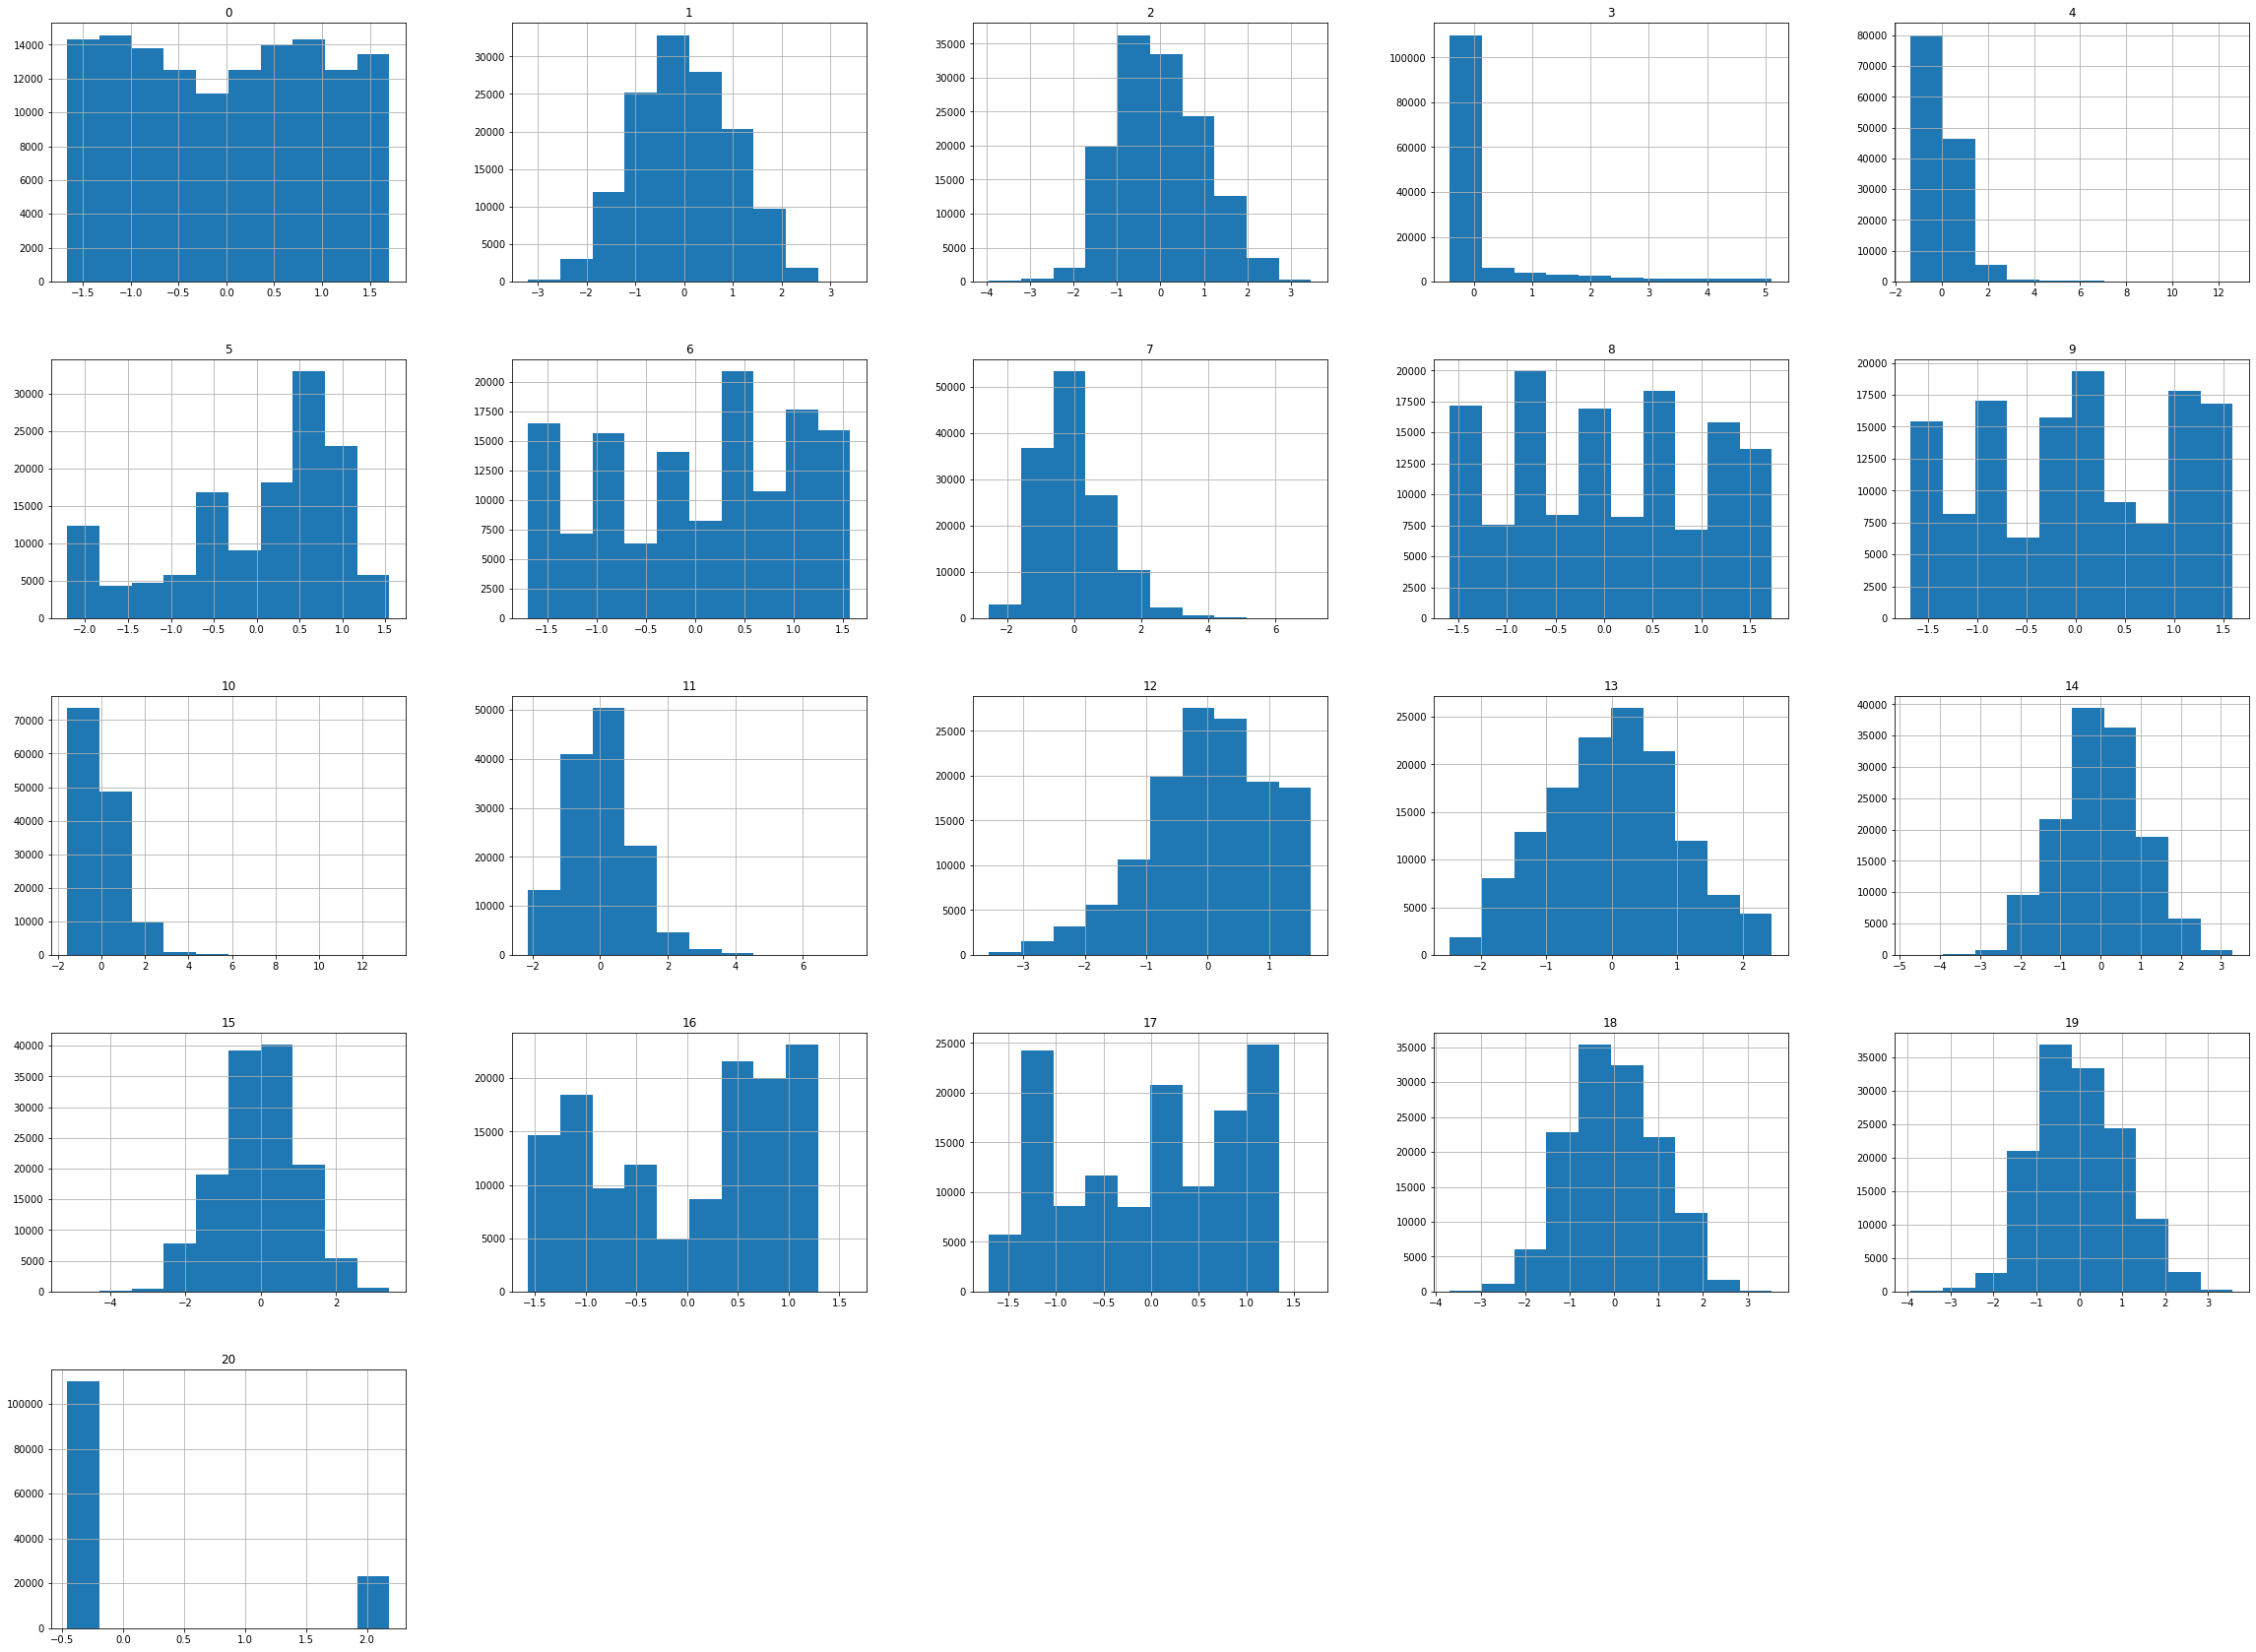

In [107]:
pd.DataFrame(scaled_data).hist(figsize=(40,30))
plt.show
